# Explore here

In [2]:
# Your code here
import pandas as pd
# from sklearn.model_selection import train_test_split


total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

# Divido el dataset en train y test *SE HACE AL FINAL* 
# train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)

# # Lo concateno para analizarlo en conjunto
# total_data = pd.concat([train_data, test_data]).reset_index(inplace= False) 
# total_data.drop(columns = ["index"], inplace = True) # Reseteo el indice y elimino la columna para que no hayan duplicados o desorden en el indice

total_data.head() # Imprimo las primeras 5 filas 

# print(train_data.shape)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
total_data.shape

(48895, 16)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 48895 filas y un total de 16 columnas. 
Podemos observar que las que tienen una mayor cantidad de nulos son las columnas de last_review y reviews_per_month con 10052 entradas nulas (20.6 % del total). Habrá que analizar como se gestionará esto, ya que según el head podría ser siempre que el number_of_reviews sea 0. 
name, host_id o host_name y neighbourhood pueden no ser relevantes para el analisis y tener demasiadas categorías únicas. 

Los datos cuentan con 10 variables númericas y 6 categoricas. 

Latitud y longitud 

In [5]:
# Visualizar si existen duplicados

print(total_data.duplicated().sum())


0


### No existen duplicados en el dataset

In [6]:
# Eliminar información OBVIAMENTE irrelevante 

total_data.drop(["id","name", "host_id", "host_name", "neighbourhood", "latitude", "longitude", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0


### Eliminación de información 

Se decide eliminar las columnas "id","name", "host_id", "host_name" ya que no aportan información relevante para el data set. Son variables categóricas con demasiadas opciones que no aportan valor significativo al análisis. 
En el caso de "neighbourhood" se decide eliminar por un motivo similar al anterior pero teniendo en cuenta que tenemos la columna "neighbourhood_group" que simplifica el contenido en menos cantidad de categorías. 
Las variables "latitude" y "longitude" son numéricas continuas que representan ubicaciones en el espacio. Dado que en este contexto utilizaremos "neighbourhood_group", descartaremos las coordenadas para evitar redundancia.
Por otro lado, eliminaremos "last_review" y "reviews_per_month", ya que nos enfocaremos en utilizar "number_of_reviews" como métrica principal para el análisis. Además, "last_review" contiene información temporal que no es relevante en este caso, a menos que quisiéramos analizar tendencias a lo largo del tiempo.

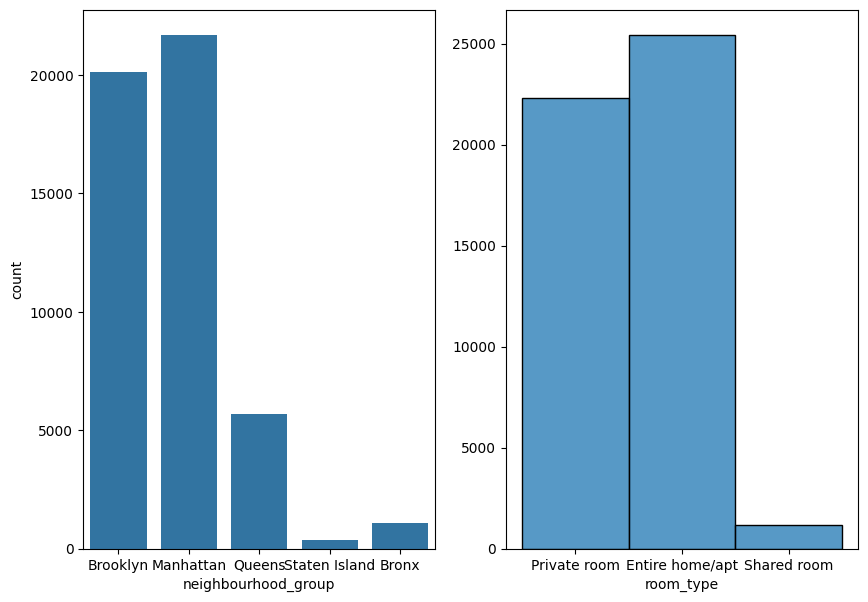

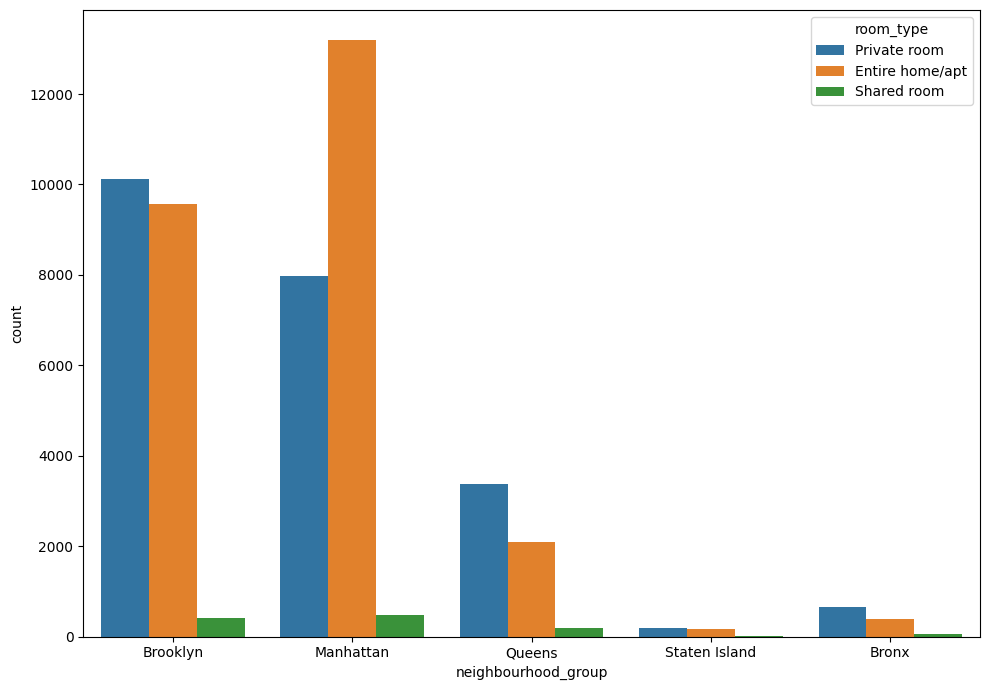

In [7]:
# Análisis de variables univariante

# Variables categóricas 
# #neighbourhood_group,	room_type

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 7))

# Crear un histograma múltiple
#sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set_xlim(-0.1, 1.1) # No me muestra todas las categorias 
sns.countplot(data=total_data, x="neighbourhood_group", ax=axis[0])
sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(ylabel = None)

plt.figure(figsize=(10, 7))
sns.countplot(data=total_data, x="neighbourhood_group", hue="room_type")


plt.tight_layout()
plt.show()



La mayor parte de las propiedades de Airbnb están concentradas en Manhattan y Brooklyn, lo que indicaría que estas zonas son las más populares (probablemente para el turismo) y/o rentables para los anfitriones. 

La mayoría de las propiedades listadas son apartamentos enteros, seguido por habitación privada. Esto podría variar como elección para los turistas en base al costo de cada opción, probablemete.



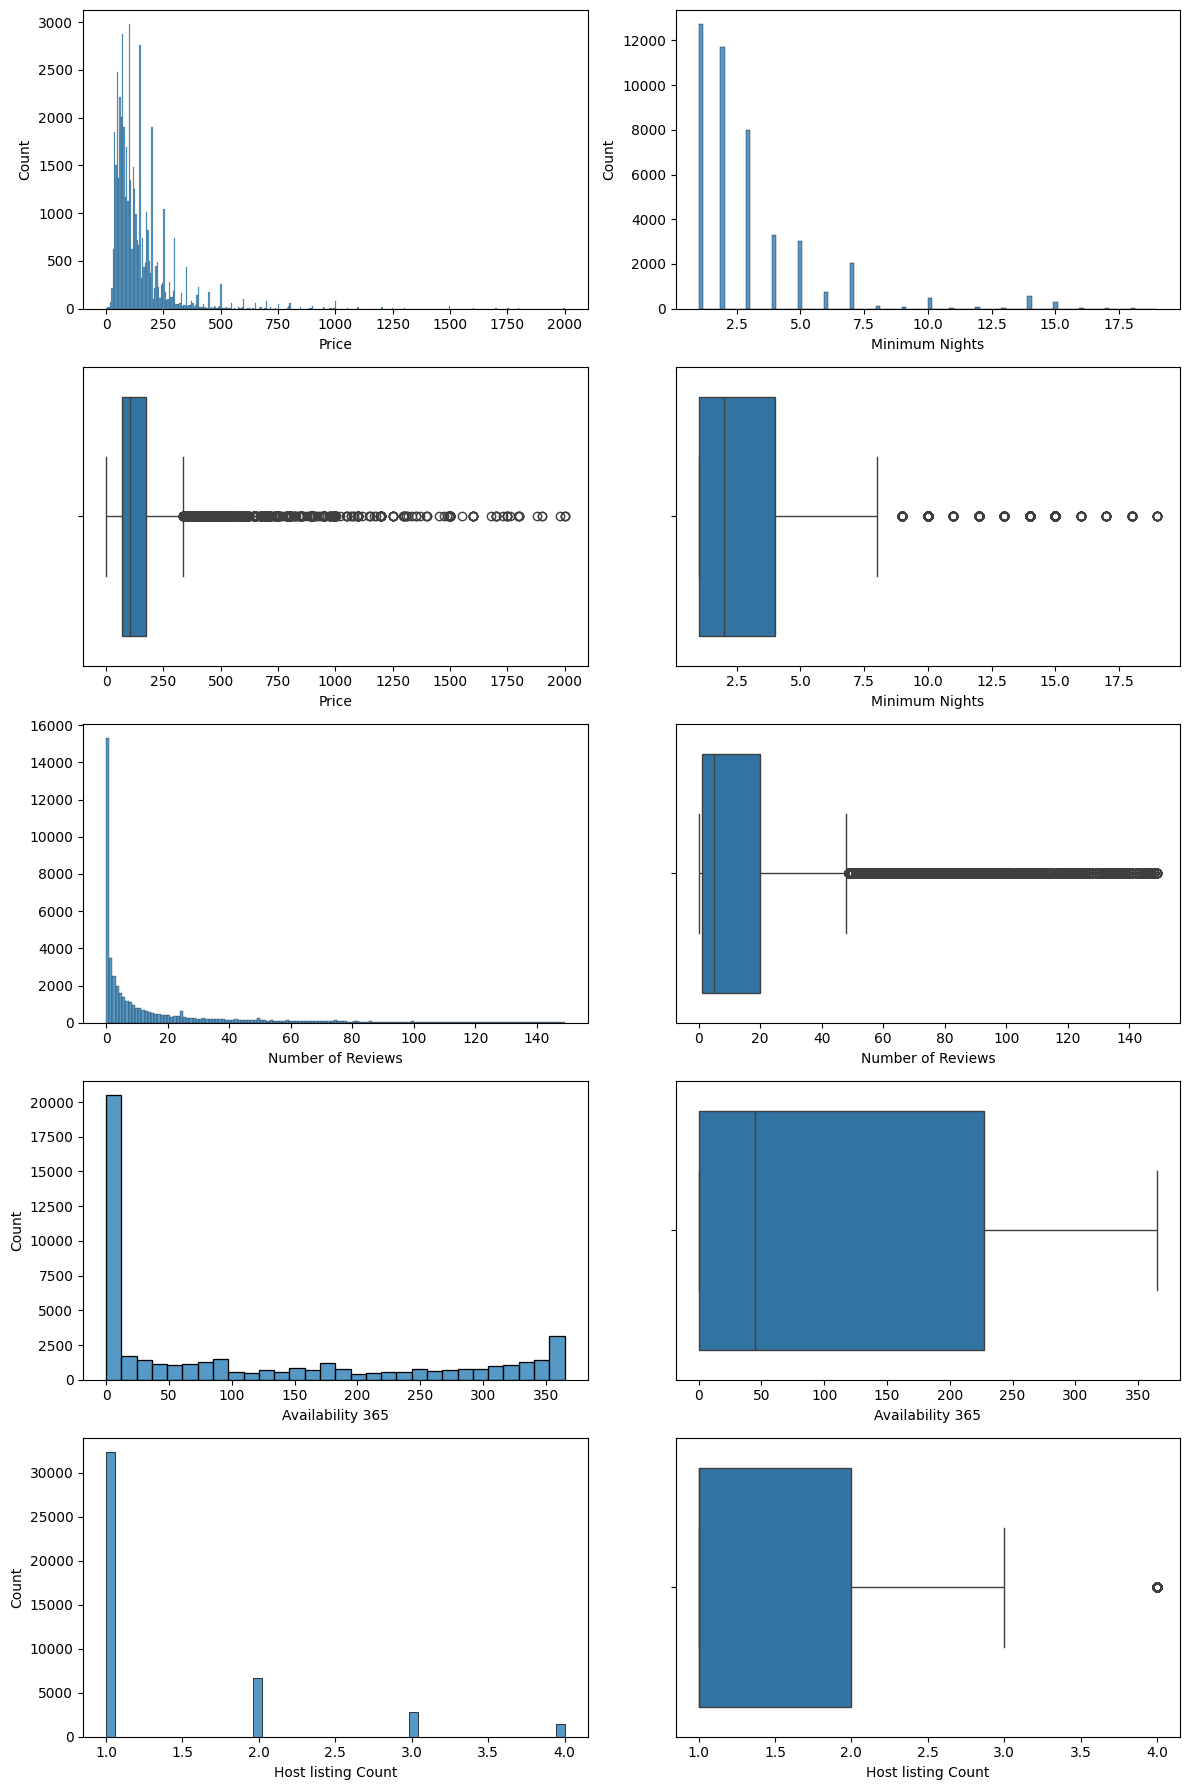

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#	price	minimum_nights	number_of_reviews	calculated_host_listings_count	availability_365

fig, axis = plt.subplots(5, 2, figsize=(12, 18))

sns.histplot(ax=axis[0, 0], data=total_data[total_data["price"] < 2000], x="price").set(xlabel="Price"  ) #xlim=2000 
sns.boxplot(ax=axis[1, 0], data=total_data[total_data["price"] < 2000], x="price").set(xlabel="Price")

sns.histplot(ax=axis[0, 1], data=total_data[total_data["minimum_nights"] < 20], x="minimum_nights").set(xlabel="Minimum Nights")
sns.boxplot(ax=axis[1, 1], data=total_data[total_data["minimum_nights"] < 20], x="minimum_nights").set(xlabel="Minimum Nights")

sns.histplot(ax=axis[2, 0], data=total_data[total_data["number_of_reviews"] < 150], x="number_of_reviews").set(xlabel="Number of Reviews", ylabel=None)
sns.boxplot(ax=axis[2, 1], data=total_data[total_data["number_of_reviews"] < 150], x="number_of_reviews").set(xlabel="Number of Reviews")


sns.histplot(ax=axis[3, 0], data=total_data, x="availability_365").set(xlabel="Availability 365")
sns.boxplot(ax=axis[3, 1], data=total_data, x="availability_365").set(xlabel="Availability 365")

sns.histplot(ax=axis[4, 0], data=total_data[total_data["calculated_host_listings_count"] < 5], x="calculated_host_listings_count").set(xlabel="Host listing Count")
sns.boxplot(ax=axis[4, 1], data=total_data[total_data["calculated_host_listings_count"] < 5], x="calculated_host_listings_count").set(xlabel="Host listing Count")


plt.tight_layout()
plt.show()

Conclusiones 

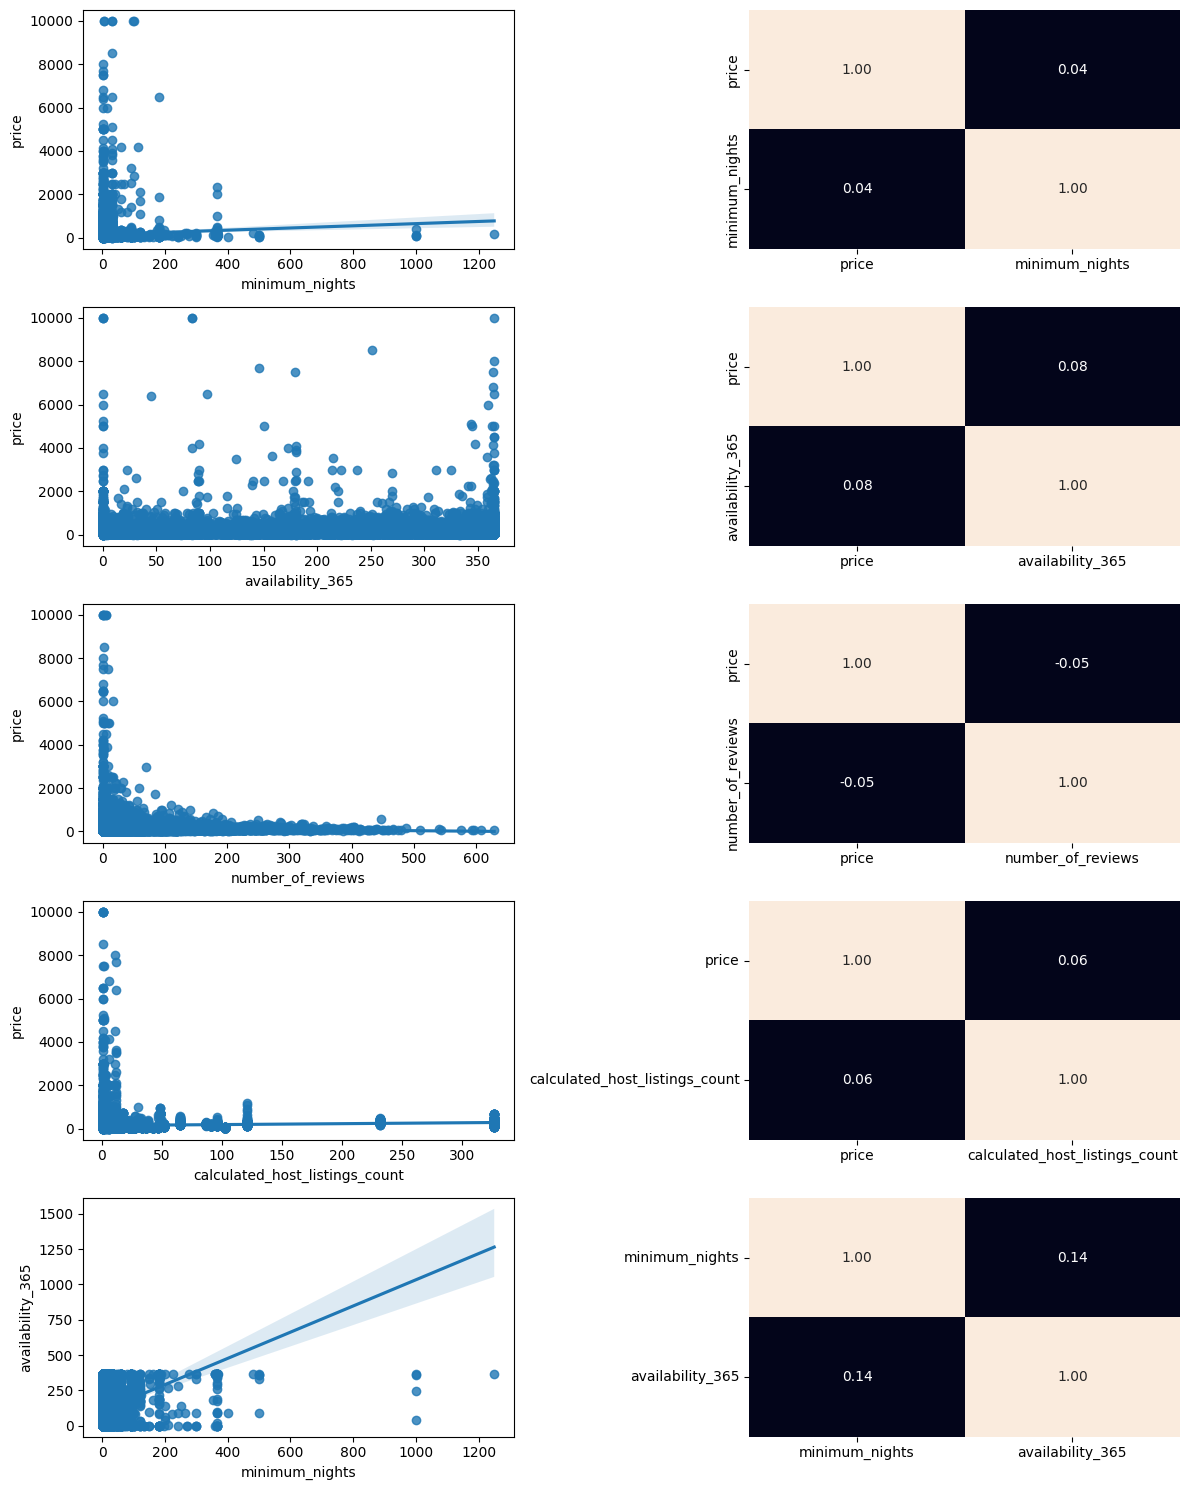

In [ ]:
### Análisis Multivariante

## Numérico  - num+érico 

fig, axis = plt.subplots(5, 2, figsize=(12, 15))

# precio vs número de noches mínimas
sns.regplot(ax=axis[0, 0], data=total_data, x="minimum_nights", y="price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)

# precio vs disponibilidad anual
sns.regplot(ax=axis[1, 0], data=total_data, x="availability_365", y="price").set(ylabel="price")
sns.heatmap(total_data[["price", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

# precio vs cantidad de reviews
sns.regplot(ax=axis[2, 0], data=total_data, x="number_of_reviews", y="price")
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

# precio vs cantidad de listings 
sns.regplot(ax=axis[3, 0], data=total_data, x="calculated_host_listings_count", y="price")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

#cantidad minima de noches vs disponibilidad anual
sns.regplot(ax=axis[4, 0], data=total_data, x="minimum_nights", y="availability_365")
sns.heatmap(total_data[["minimum_nights", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)


plt.tight_layout()
plt.show()

Podríamos decir que hy una leve relación inversa entre cantidad de reviews y precio, a más reseñas precios más bajos. Entre la cantidad minima de noches y la disponibilidad hay una relación positiva leve, cuando la cantidad de noches mínimas aumenta la disponibilidad tiende a aumentar. En este caso esta última comparación no nos aporta mucho. 

Por lo que se puede ver las relaciones netre las variables no son muy fuertes, esto sugiere una poca o ninguna dependencia lineal entre las variables. 

Esto nos podría indicar que el precio de las propiedades podría depender de otras variables a analizar a continuación. 

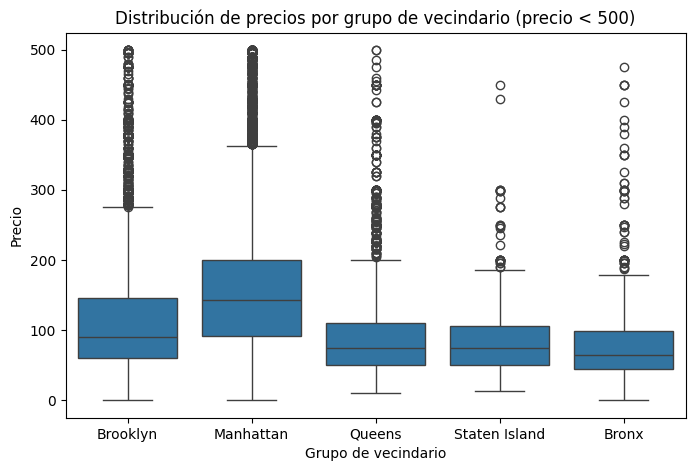

In [10]:
## Análisis numérico - categórico 

plt.figure(figsize=(8, 5))
sns.boxplot(data=total_data[total_data['price'] < 500], x="neighbourhood_group", y="price")
plt.title("Distribución de precios por grupo de vecindario (precio < 500)")
plt.xlabel("Grupo de vecindario")
plt.ylabel("Precio")
plt.show()


Se observan outliers en todos los vecindarios, pero especialmente en Manhattan y Brooklyn, lo que indica que hay algunas propiedades con precios desproporcionadamente altos.

Conclusión: Manhattan es el vecindario más caro en general, Brooklyn tambien tiene precios altos, pero con una mayor variabilidad. Queens, Staten Island y Bronx tienen precios más accesibles.

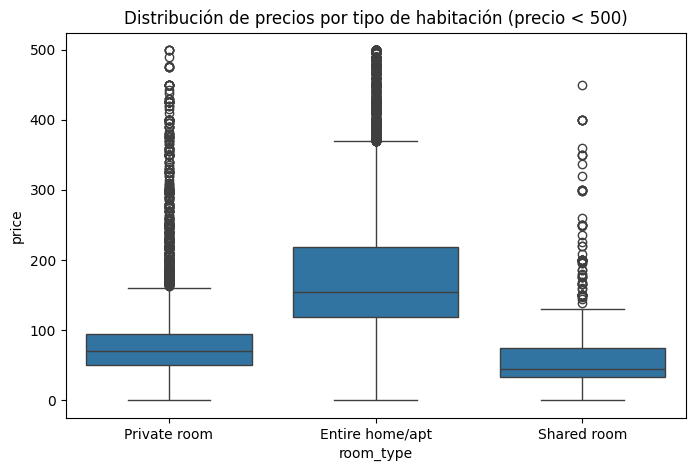

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=total_data[total_data['price'] < 500], x="room_type", y="price")
plt.title("Distribución de precios por tipo de habitación (precio < 500)")
plt.show()


Alquilar un apartamento completo es significativamente más caro que una habitación privada o compartida.
Las habitaciones privadas son una opción de precio medio.
Las habitaciones compartidas son las más económicas, pero con menor variabilidad en precios.

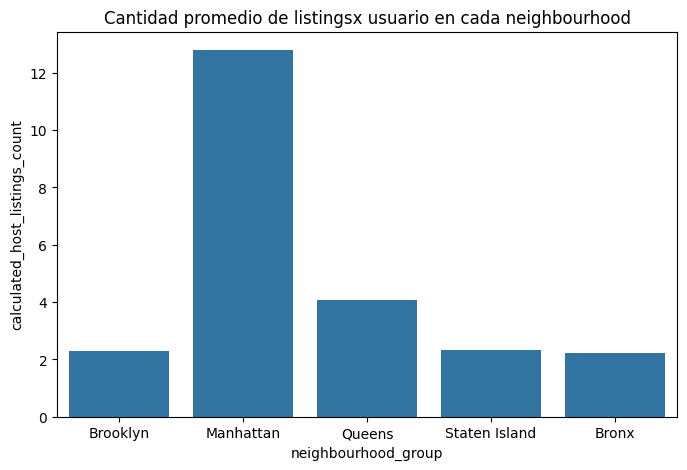

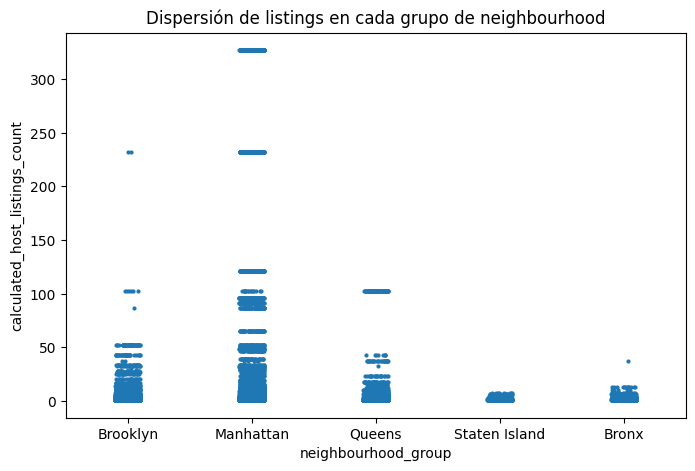

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=total_data, x="neighbourhood_group", y="calculated_host_listings_count", errorbar=None)
plt.title("Cantidad promedio de listingsx usuario en cada neighbourhood")
plt.show()

plt.figure(figsize=(8, 5))
sns.stripplot(data=total_data, x="neighbourhood_group", y="calculated_host_listings_count", jitter=True, size=3)
plt.title("Dispersión de listings en cada grupo de neighbourhood")
plt.show()


Manhattan tiene un promedio mucho mayor que el resto, de 12 listings por anfitrión, Queens tiene aprox 4. El resto aprox 2 por anfitrión 
Los primeros tienen tienen una gran dispersión destacando Manhattan con anfitriones con más de 300 listings. 

Manhattan es el más caro, con una mediana de precios superior a cualquier otro barrio.
Brooklyn tiene una cantidad significativa de listings por anfitrión, aunque menor que Manhattan.
Su distribución de precios es amplia, con una mediana alta pero más valores en la parte baja.
Esto indica un mercado más diverso, con opciones tanto premium como accesibles.
Queens, Bronx y Staten Island tienen menos listings por anfitrión y menor dispersión en la cantidad de propiedades gestionadas.
También presentan precios más bajos, con una mediana alrededor de 100 USD o menos.
Esto sugiere que estos vecindarios son más adecuados para viajeros con presupuesto limitado.

Apartamentos completos son los más caros y predominan en Manhattan y Brooklyn
La alta cantidad de listings por anfitrión en Manhattan puede estar impulsada por propietarios con múltiples apartamentos completos.
En Brooklyn, aunque también hay apartamentos costosos, hay más variedad en precios.
Habitaciones privadas y compartidas dominan en vecindarios más económicos
En Queens, Bronx y Staten Island, los precios son más bajos y es probable que haya más habitaciones privadas y compartidas en oferta.

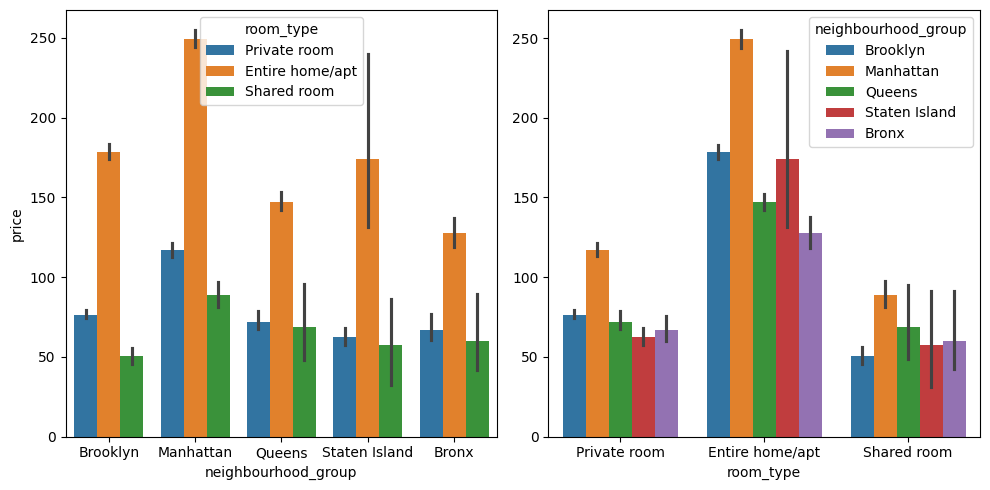

In [15]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")
sns.barplot(ax = axis[1], data = total_data, x = "room_type", y = "price", hue = "neighbourhood_group").set(ylabel = None)

plt.tight_layout()

plt.show()

Pdríamos decir que tanto el vecindario como el tipo de alojación son variables importantes a la hora de definir el precio. 

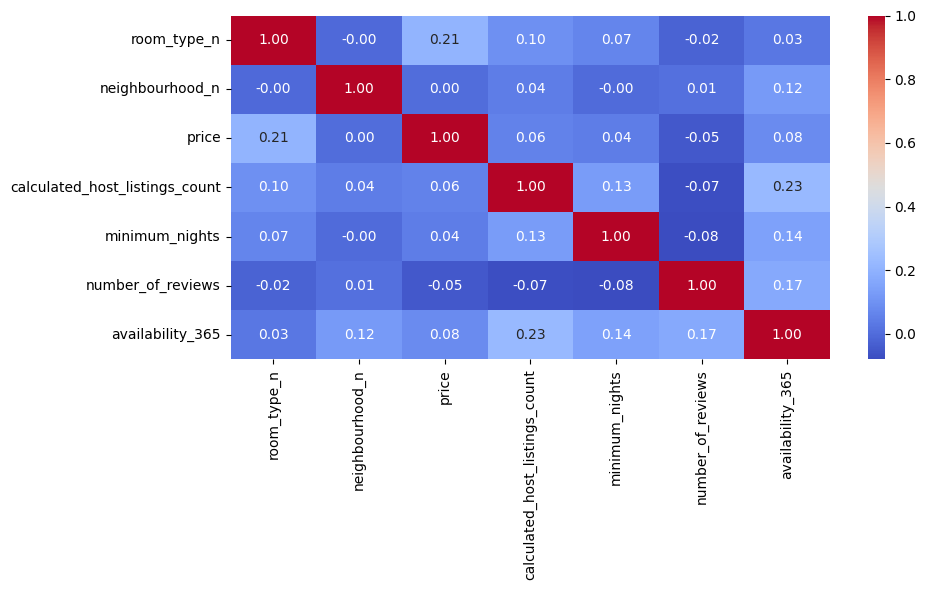

In [ ]:
# Convertimos variables categóricas en numéricas
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]


fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(total_data[["room_type_n","neighbourhood_n", "price", "calculated_host_listings_count", "minimum_nights", "number_of_reviews", "availability_365"]].corr(), 
            annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()
plt.show()


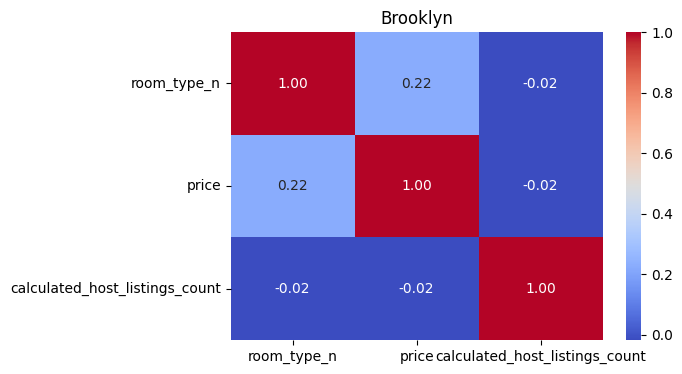

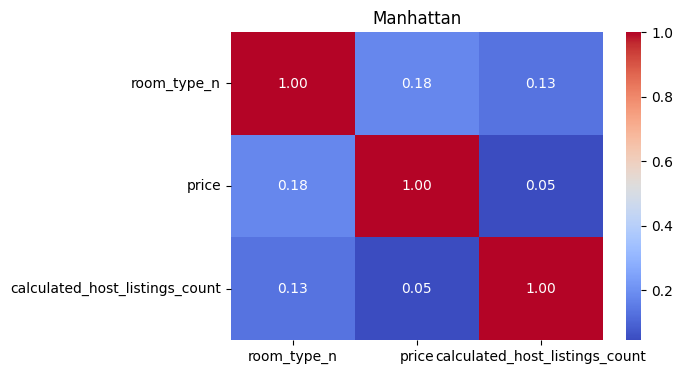

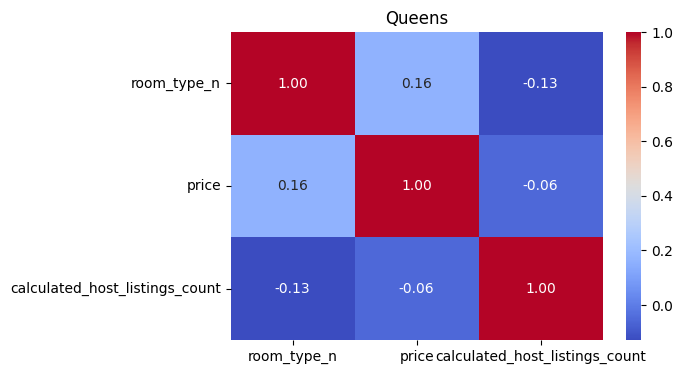

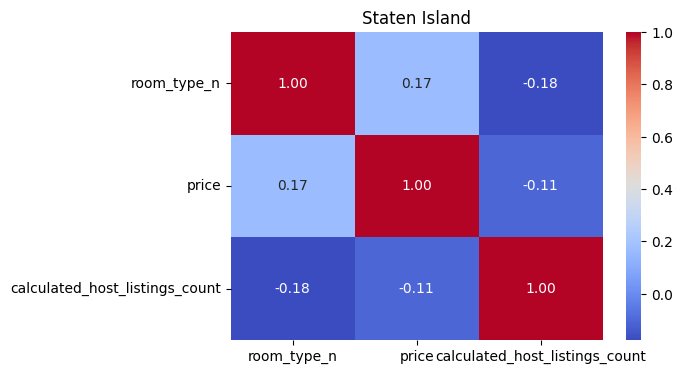

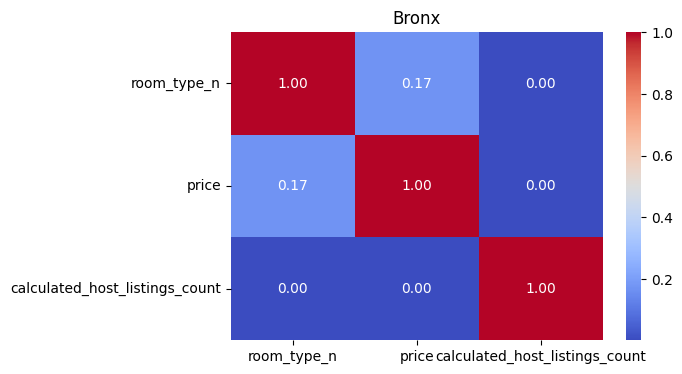

In [18]:
# Calcular la correlación de price con otras variables dentro de cada barrio
for neighbourhood in total_data["neighbourhood_group"].unique():
    subset = total_data[total_data["neighbourhood_group"] == neighbourhood]
    corr_matrix = subset[["room_type_n", "price", "calculated_host_listings_count"]].corr()
    
    plt.figure(figsize=(6,4))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"{neighbourhood}")
    plt.show()


El tipo de habitación es el factor más importante en el precio.
El número de propiedades de un anfitrión no influye mucho en los precios.
El barrio no parecería estar directamente relacionado con el precio al transformarlo en una variable numérica(contrario de lo que podíamos pensar anteriormente).

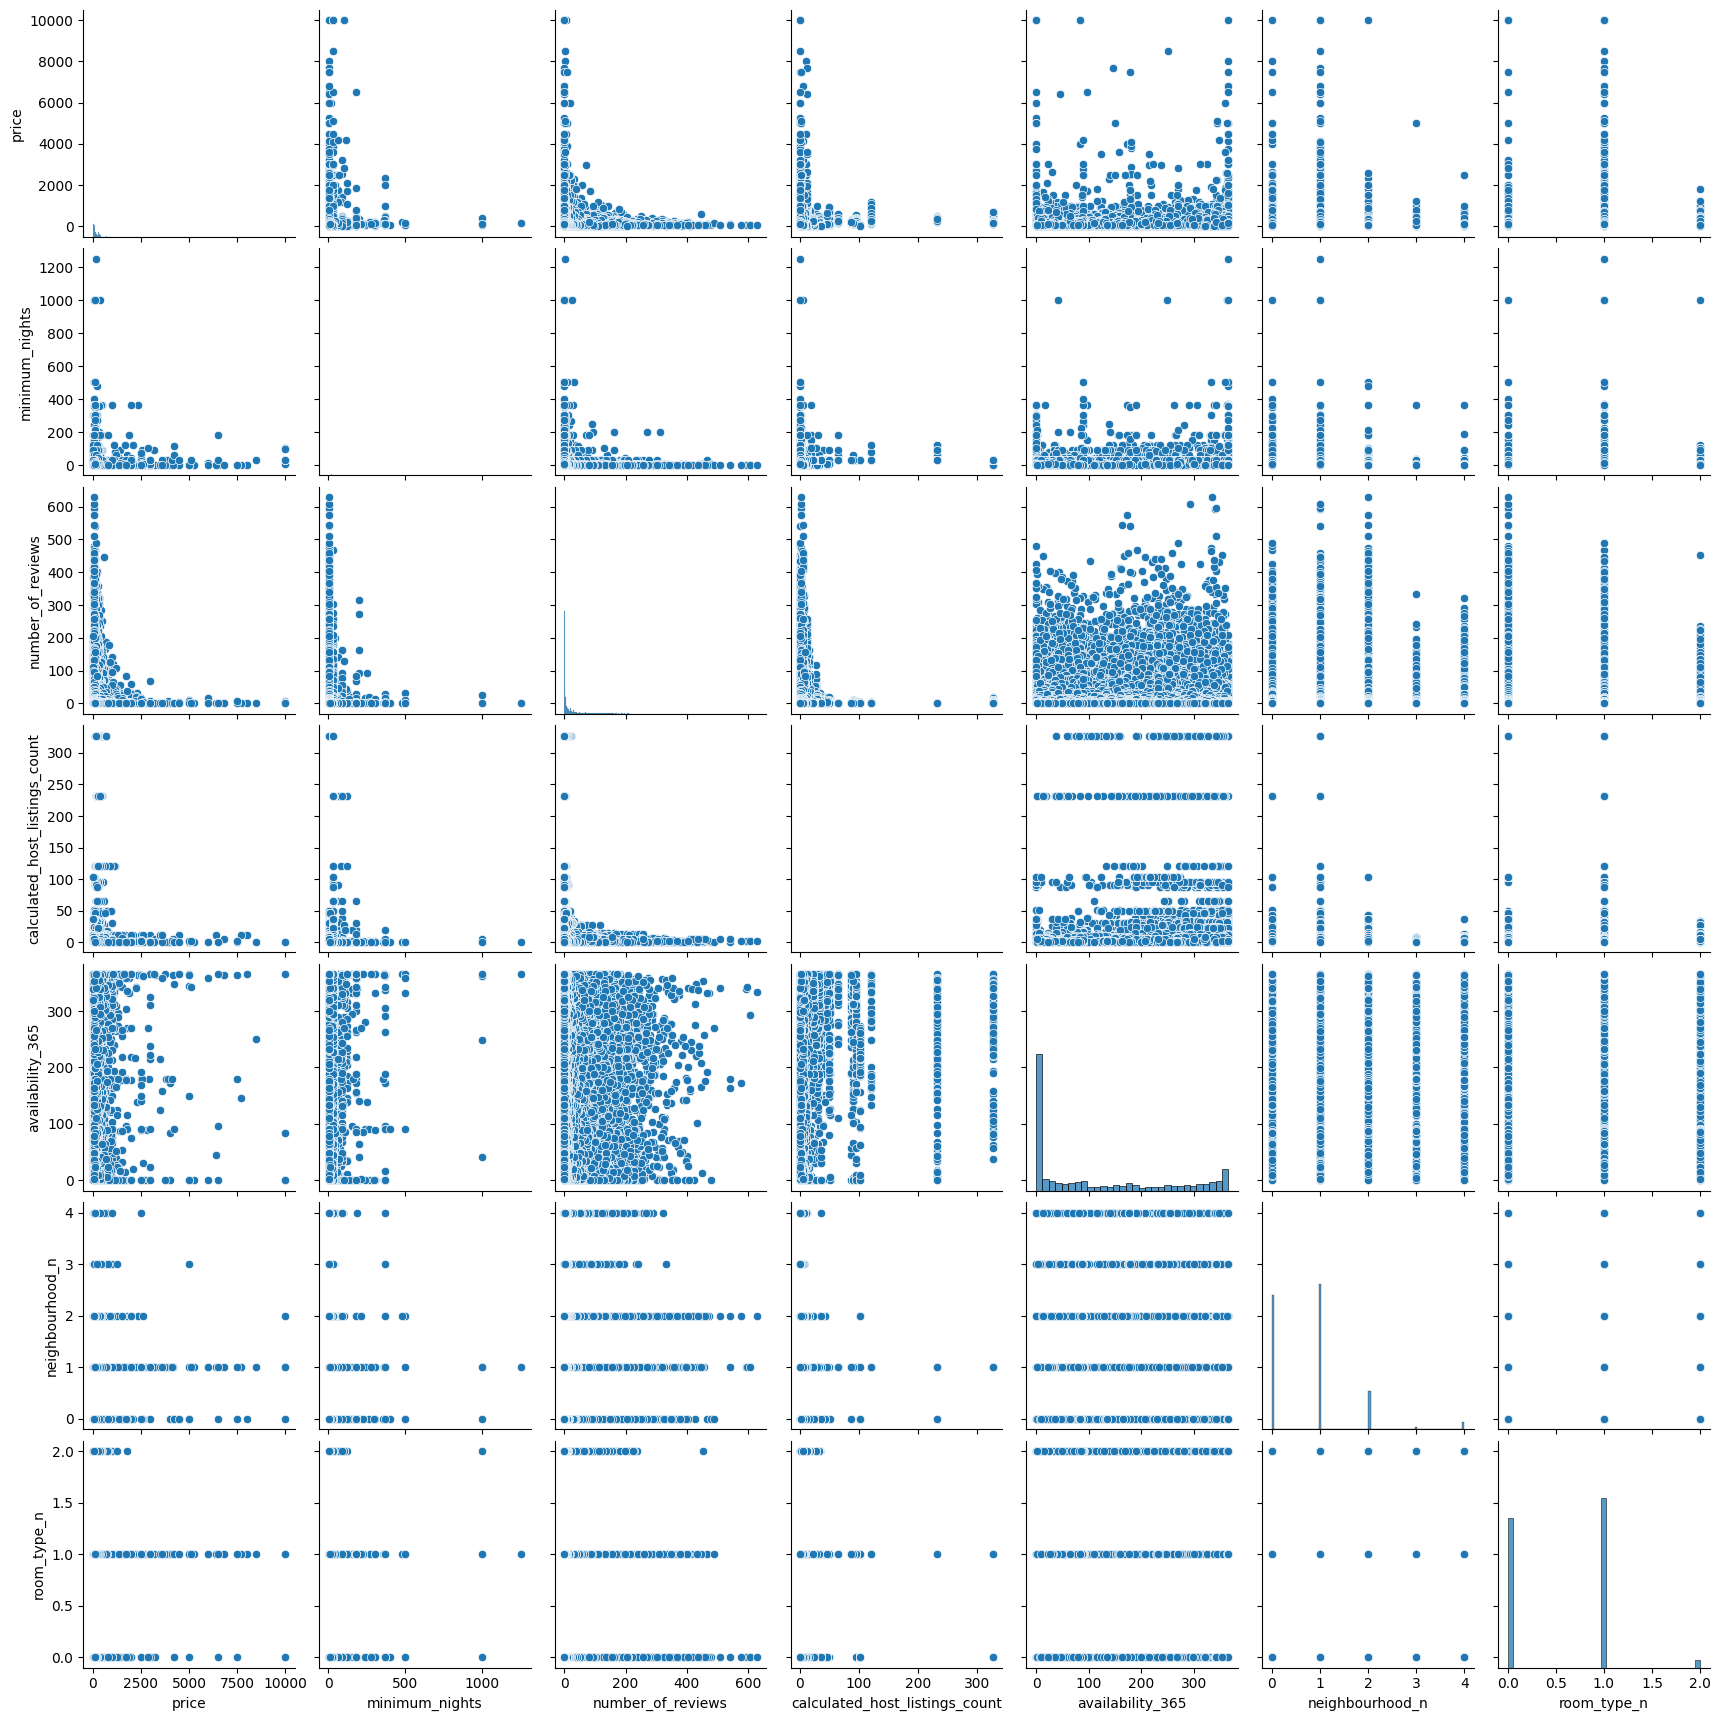

In [21]:
sns.pairplot(data = total_data)

Los anfitriones con muchas propiedades no necesariamente cobran más por cada una. 
No parece haber una correlación clara entre la disponibilidad y el precio. 


In [26]:
#Encontrar cantidad minima de noches mayor en el data set 
max_minimum_nights = total_data["minimum_nights"].max()
print("El máximo de noches mínimas es:", max_minimum_nights)


num_mayor_30 = (total_data["minimum_nights"] > 30).sum()
print("Cantidad de registros con más de 30 noches mínimas:", num_mayor_30)


## Más de 30 noches serían una larga estancia por lo que no serían datos que me interese tener me podrían generar errores ¿no?


El máximo de noches mínimas es: 1250
Cantidad de registros con más de 30 noches mínimas: 747
